In [1]:
election <- read.csv("../Data/election_2022.csv", stringsAsFactors = F)
head(election)
library(dplyr)
library(plotrix)
library(stringr)
options(scipen = 100)
par(family = "AppleGothic")
options(warn = -1)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
vote <- aggregate(cbind(투표수,선거인수,이재명, 윤석열, 심상정)~광역시도, election, sum)
vote$투표율 <- vote$투표수 / vote$선거인수 * 100
arrange(vote, 투표율)[1,1]
arrange(vote, 투표율)[nrow(vote),1]

[1] "제주특별자치도"

[1] "광주광역시"

In [3]:
result <- subset(vote, vote[,1] == arrange(vote, 투표율)[1,1] | vote[,1] == arrange(vote, 투표율)[nrow(vote),1])

In [4]:
result[,4:6] <- result[,4:6] / result[,2] * 100

In [11]:
result$투표율 <- 100 - (result$이재명 + result$윤석열 + result$심상정)

In [17]:
result
str(result)

,광역시도,투표수,선거인수,이재명,윤석열,심상정,투표율
5,광주광역시,985492,1209206,84.22778,12.63440,1.508384,1.629440
15,제주특별자치도,409649,564354,52.02747,42.23469,3.319427,2.418412


'data.frame':	2 obs. of  7 variables:
 $ 광역시도: chr  "광주광역시" "제주특별자치도"
 $ 투표수  : int  985492 409649
 $ 선거인수: int  1209206 564354
 $ 이재명  : num  84.2 52
 $ 윤석열  : num  12.6 42.2
 $ 심상정  : num  1.51 3.32
 $ 투표율  : num  1.63 2.42


In [34]:
a <- as.matrix((result[,7:4]))

In [35]:
t(a)

,5,15
투표율,1.629440,2.418412
심상정,1.508384,3.319427
윤석열,12.634400,42.234694
이재명,84.227777,52.027467


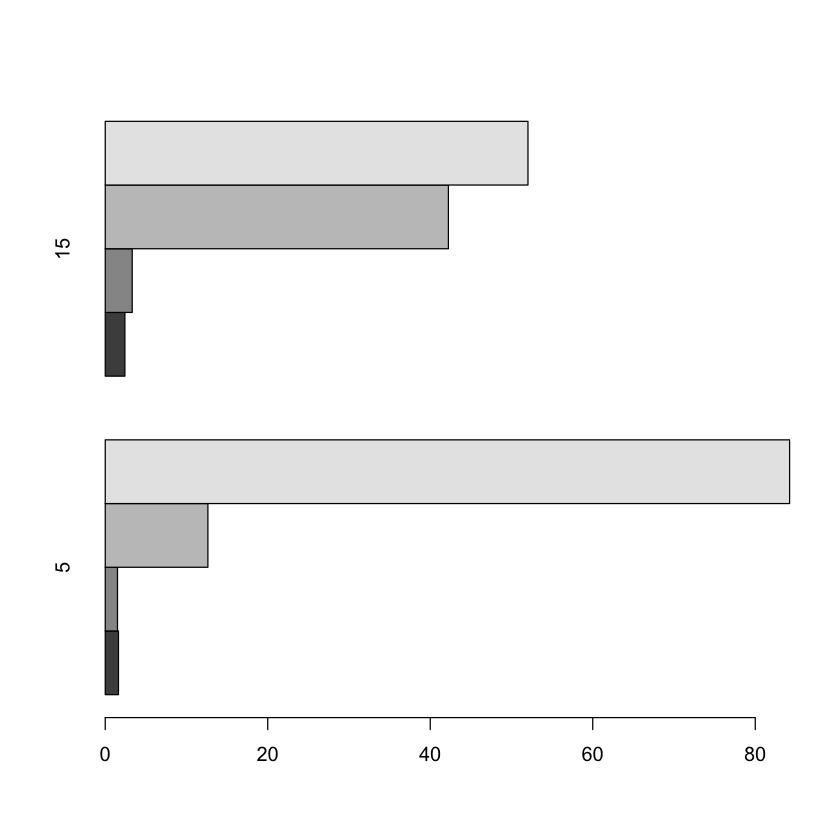

In [36]:
barplot(t(a),beside=T,horiz=T)